## Import important libraries

In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Uploading the data and converting the columns to numpy array

In [33]:
data = pd.read_csv("/content/orbit.csv")
time_steps = data['time_steps'].to_numpy()
y_positions = data['y'].to_numpy()


## Checking for nulls

In [49]:
data.isnull().sum()

,0
time_steps,0
y,0


## Building neural network model using Keras, consisting of a sequential architecture with three hidden layers (1024, 512, and 128 neurons) using ReLU activation, and one output layer with a single neuron

In [48]:
model = Sequential()
model.add(Dense(1024, input_shape=(1, ), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## compiling the neural network model using the Adam optimizer and mean squared error as the loss function on 200 epochs

In [50]:
model.compile(optimizer='adam', loss='mse')
model.fit(time_steps, y_positions, epochs=200)

Epoch 1/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 816.5143
Epoch 2/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 95.9140
Epoch 3/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 43.8092
Epoch 4/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 12.1370
Epoch 5/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.6344
Epoch 6/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9721
Epoch 7/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5829
Epoch 8/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2061
Epoch 9/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2470
Epoch 10/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3350
Epoch 11/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2565
Epoch 12/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3409
Epoch 13/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0818
Epoch 14/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1428
Epoch 15/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

## Evaluating the model's performance using metrics MSE, Mean Absolute Error (MAE) ,and R-squared
## Define the loss function and optimizer

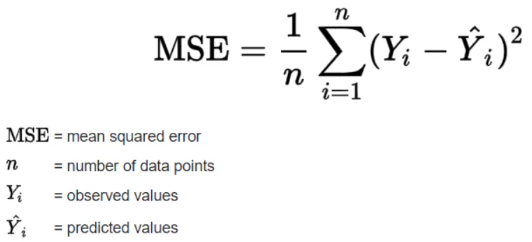

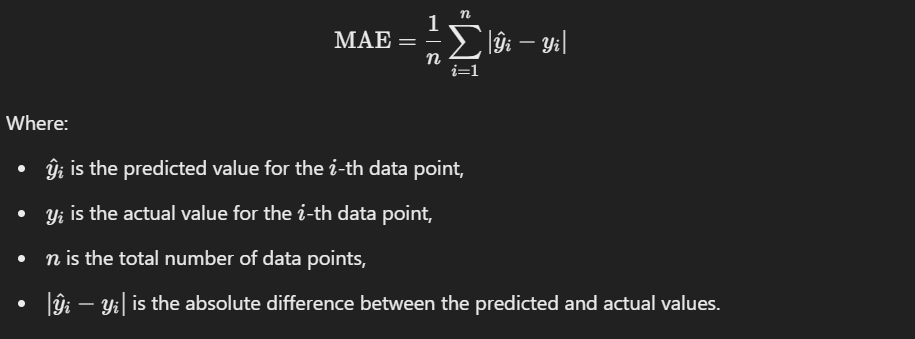

##R2:
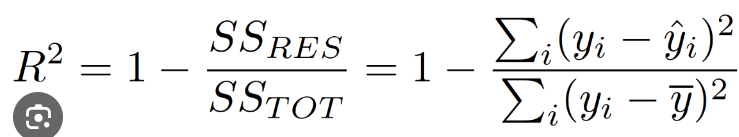

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(time_steps)
mse = mean_squared_error(y_positions, y_pred)
mae = mean_absolute_error(y_positions, y_pred)
r2 = r2_score(y_positions, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error (MSE): 0.033494044944132
Mean Absolute Error (MAE): 0.11682152214957989
R-squared: 0.9999623944575297


## plotting the predicted orbital positions from a neural network against the actual scientist's orbit

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


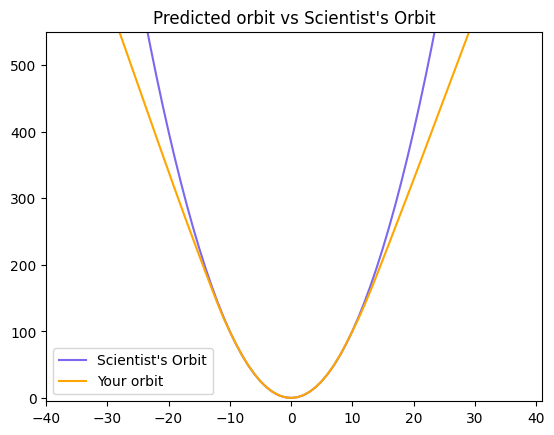

In [52]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")

# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-100, 101))

# Plot the eighty minute orbit
plot_orbit(eighty_min_orbit)